In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
import db_utils, sqlalchemy
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
from scipy.stats import fisher_exact
from scipy import stats
import matplotlib.pyplot as plt
import math
import os
import gzip
import re
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
import time
from collections import Counter
plt.rcParams['axes.spines.top'] = False # remove top spine
plt.rcParams['axes.spines.right'] = False # remove right spine
plt.rcParams['pdf.fonttype'] = 42 # Set the fonttype to export fonts as font files
plt.rcParams['font.family'] = 'Arial'
global_fontsize = 14
figsize = (3,3)
legend_fontsize = 8
#bbox_to_anchor =(1.0, 1.0)
import requests
save_path= '/Users/johgeist/Documents/AG_Luck/3did_project/revisions/revision_figures/'

In [3]:
# Connect to the MySQL database and read the preprocessed 3did into a DataFrame
eng = sqlalchemy.create_engine('mysql://', creator= db_utils.get_connection)
query= pd.read_sql_query('''select * from chopyan_db.3did_agg_DDI_PDB as df''', con= eng)
DDI_CS = pd.DataFrame(query)
DDI_CS

,DDI_type,PDB_ID,Chain_ID1,DomainID1,DomainName1,DomainStart1,DomainEnd1,Chain_ID2,DomainID2,DomainName2,DomainStart2,DomainEnd2,Score,Zscore,Chain1Iface,Chain2Iface,isInterchain
0,PF00001_PF00001,1gzm,A,PF00001,7tm_1,54,306,B,PF00001,7tm_1,54,306,26.18,7.82923,"E:196,E:196,E:196,E:196,E:197,N:199,E:201,E:20...","F:228,K:231,E:232,A:233,E:232,F:228,V:227,F:22...",1
1,PF00001_PF00001,1hzx,B,PF00001,7tm_1,54,246,B,PF00001,7tm_1,224,306,42.49,7.03413,"I:54,I:54,I:54,N:55,N:55,N:55,T:58,L:72,L:72,L...","V:300,P:303,V:304,A:299,V:300,P:303,Y:306,V:25...",0
2,PF00001_PF00001,1l9h,B,PF00001,7tm_1,54,246,B,PF00001,7tm_1,224,306,40.17,9.39410,"I:54,I:54,N:55,N:55,N:55,T:58,L:72,L:72,L:72,L...","V:300,P:303,A:299,V:300,P:303,Y:306,V:250,M:25...",0
3,PF00001_PF00001,2j4y,A,PF00001,7tm_1,54,306,B,PF00001,7tm_1,54,306,26.85,6.86878,"N:199,E:201,E:201,E:201,S:202,S:202,I:205,V:20...","Q:236,F:228,K:231,E:232,F:228,E:232,F:228,F:22...",1
4,PF00001_PF00001,2vt4,C,PF00001,7tm_1,58,343,D,PF00001,7tm_1,58,343,20.02,6.36751,"L:152,V:160,T:164,T:164,A:167,I:168,I:168,A:17...","F:315,A:206,A:206,A:210,W:181,A:210,I:214,W:18...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235443,PF18841_PF17433,1wmr,A,PF18841,B_solenoid_dext,321,354,A,PF17433,Glyco_hydro_49N,19,184,9.52,4.52235,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0
235444,PF18841_PF17433,1x0c,B,PF18841,B_solenoid_dext,321,354,B,PF17433,Glyco_hydro_49N,19,184,9.52,4.45403,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0
235445,PF18841_PF17433,2z8g,A,PF18841,B_solenoid_dext,321,354,A,PF17433,Glyco_hydro_49N,19,184,9.24,4.49346,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0
235446,PF18841_PF17433,3wwg,C,PF18841,B_solenoid_dext,321,354,C,PF17433,Glyco_hydro_49N,19,184,9.24,4.61412,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0


In [4]:
DDI_CS['PDB_ID']= DDI_CS['PDB_ID'].str.upper()

In [5]:
# Merge DDI_CS with additional protein information
df_protein_info = pd.read_csv('/Users/johgeist/Downloads/DDI_type_structure_level_interchain_homo_protein_whole_3did.csv', index_col=0)
df_protein_info= df_protein_info.drop(columns=['IsInterchain', 'Chain1', 'Chain2'])
DDI_CS= pd.merge(DDI_CS, df_protein_info, on=['DDI_type', 'PDB_ID'])

In [20]:
# Group DDI_CS based on 'DDI_type' to create dataframes containing homodimeric or intrachain DDI types 
DDI_grouped = DDI_CS.groupby('DDI_type').agg({'isInterchain': max, 'HomoProtein': min})
DDIs_intra = DDI_grouped[(DDI_grouped['isInterchain']==0)] # & (DDI_grouped['HomoProtein']==0)] # No intrachain hetero-protein DDI types
DDIs_intra = DDIs_intra.reset_index()
DDIs_homodimer = DDI_grouped[(DDI_grouped['HomoProtein']==1) & (DDI_grouped['isInterchain']== 1)]
DDIs_homodimer = DDIs_homodimer.reset_index()

In [23]:
# Filter for rows that relate to intrachain interfaces
DDI_CS_intra = DDI_CS[DDI_CS['DDI_type'].isin(DDIs_intra['DDI_type'].tolist())]
DDI_CS_HomoProtein = DDI_CS[DDI_CS['DDI_type'].isin(DDIs_homodimer['DDI_type'].tolist())]

In [26]:
# Select one interface per DDI type as well as its metrics based on the highest 3did score
df_intra_index_max_Score = DDI_CS_intra.groupby('DDI_type').agg({'Score': 'idxmax'})
DDI_intra_grouped_max_Score = DDI_CS_intra[DDI_CS_intra.index.isin(df_intra_index_max_Score.Score.tolist())]


df_homodimer_index_max_Score = DDI_CS_HomoProtein.groupby('DDI_type').agg({'Score': 'idxmax'})
DDI_homodimer_grouped_max_Score = DDI_CS_HomoProtein[DDI_CS_HomoProtein.index.isin(df_homodimer_index_max_Score.Score.tolist())]

In [29]:
DDI_homodimer_grouped_max_Score

,DDI_type,PDB_ID,Chain_ID1,DomainID1,DomainName1,DomainStart1,DomainEnd1,Chain_ID2,DomainID2,DomainName2,...,DomainEnd2,Score,Zscore,Chain1Iface,Chain2Iface,isInterchain,HomoDDI,UniProt1,UniProt2,HomoProtein
24,PF00001_PF00001,4BV0,A,PF00001,7tm_1,81,369,B,PF00001,7tm_1,...,369,54.19,11.07590,"L:158,V:161,V:161,S:162,V:165,V:165,V:165,V:16...","F:248,F:248,V:252,F:248,F:248,L:251,V:252,I:25...",1,1,P20789,P20789,1
170,PF00001_PF07361,6LW5,A,PF00001,7tm_1,43,302,A,PF07361,Cytochrom_B562,...,1105,9.95,5.07145,"A:181,P:187,E:188,E:188,E:188,E:188,L:191,K:26...","Q:1103,I:1102,N:1011,K:1015,R:1098,I:1102,I:11...",0,0,"P0ABE7,P25090","P0ABE7,P25090",1
273,PF00002_PF00002,5EE7,A,PF00002,7tm_2,138,1028,A,PF00002,7tm_2,...,396,81.01,12.12860,"Y:138,Y:138,F:141,F:141,F:141,F:141,M:144,M:14...","M:301,F:383,M:301,F:383,L:386,A:387,A:387,F:39...",0,1,"P47871,P00720","P47871,P00720",1
342,PF00002_PF00959,5EE7,A,PF00002,7tm_2,138,1028,A,PF00959,Phage_lysozyme,...,1146,30.33,8.29270,"I:1001,I:1001,I:1001,I:1001,F:1002,F:1002,M:10...","V:1069,A:1095,I:1098,N:1099,F:1065,V:1069,A:10...",0,0,"P47871,P00720","P47871,P00720",1
600,PF00004_PF01434,2CE7,C,PF00004,AAA,197,330,C,PF01434,Peptidase_M41,...,600,8.80,4.10328,"V:200,G:201,P:202,P:202,P:203,P:203,N:307,R:30...","Y:450,Y:450,R:448,Y:450,R:448,Y:450,Y:450,Y:45...",0,0,Q9WZ49,Q9WZ49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235364,PF18795_PF18795,3VLD,A,PF18795,HSM3_N,9,248,B,PF18795,HSM3_N,...,248,16.32,5.92465,"V:9,R:34,R:34,R:34,L:38,L:38,L:38,N:39,T:42,T:...","I:231,V:147,E:148,D:150,T:190,V:194,L:232,L:23...",1,1,P38348,P38348,1
235368,PF18797_PF00514,3T7U,B,PF18797,APC_rep,405,466,A,PF00514,Arm,...,731,2.70,2.47247,"R:414,R:414,E:418,E:418,E:418,E:418,E:418,W:42...","I:711,H:712,M:720,G:721,A:723,A:724,A:725,K:71...",1,0,P25054,P25054,1
235369,PF18797_PF18797,4YJL,A,PF18797,APC_rep,401,466,F,PF18797,APC_rep,...,466,11.52,3.89769,"H:404,H:405,H:405,H:408,H:408,H:408,H:408,L:40...","E:418,E:418,W:421,A:415,E:418,T:419,E:422,W:42...",1,1,P25054,P25054,1
235400,PF18818_PF18818,6SNA,B,PF18818,MPTase-PolyVal,151,276,G,PF18818,MPTase-PolyVal,...,276,5.54,3.80760,"F:189,G:194,I:246,I:246,I:246,D:248,D:250,D:25...","F:219,F:219,S:220,D:221,Y:225,R:218,T:177,R:21...",1,1,Q6I6B2,Q6I6B2,1


In [40]:
# Check whether there are NaN values for the UniProt IDs (from the protein information df)
# Drop those rows that are homodimeric due too 'No Uniprot' for both proteins holding the 
# potentially interacting domains

# As DDI_intra_grouped_max_Score only holds all-intrachain DDIs, there are only homo-protein DDIs as the
# interface is formed within just one protein, thus just DDI_homodimer_grouped_max_Score is checked

na_homodimers = DDI_homodimer_grouped_max_Score[(DDI_homodimer_grouped_max_Score['UniProt1']== 'No UniProt') & (DDI_homodimer_grouped_max_Score['UniProt2']== 'No UniProt')]['DDI_type'].tolist()
DDI_homodimer_grouped_max_Score_no_na = DDI_homodimer_grouped_max_Score[~DDI_homodimer_grouped_max_Score['DDI_type'].isin(na_homodimers)]


In [42]:
# Keep only those columns that are necessary for further analysis, DDI_type is the unique idendifier for each DDI

DDI_intra_homodimer = DDI_intra_grouped_max_Score.filter(['DDI_type', 'Score', 'Zscore', 'PDB_ID'])

DDI_inter_homodimer = DDI_homodimer_grouped_max_Score_no_na.filter(['DDI_type', 'Score', 'Zscore', 'PDB_ID'])

In [94]:
# Generate subsets without synthetic construct domains Ank PF00023 (14), PF12796(48),
# PF13606(1), PF13637(15), PF13657(1), V-set PF07686 (79)
syn_cons_domains = ['PF00023', 'PF07686', 'PF12796', 'PF13606', 'PF13637', 'PF13657']
DDI_intra_homodimer_wsc = DDI_intra_homodimer.copy()
DDI_intra_homodimer_wsc['DDI_type_split'] = DDI_intra_homodimer_wsc['DDI_type'].str.split('_')
rows_to_drop = DDI_intra_homodimer_wsc.apply(lambda row: any(set(syn_cons_domains).intersection(row['DDI_type_split'])), axis=1)
DDI_intra_homodimer_wsc = DDI_intra_homodimer_wsc[~rows_to_drop]

DDI_inter_homodimer_wsc = DDI_inter_homodimer.copy()
DDI_inter_homodimer_wsc['DDI_type_split'] = DDI_inter_homodimer_wsc['DDI_type'].str.split('_')
rows_to_drop = DDI_inter_homodimer_wsc.apply(lambda row: any(set(syn_cons_domains).intersection(row['DDI_type_split'])), axis=1)
DDI_inter_homodimer_wsc = DDI_inter_homodimer_wsc[~rows_to_drop]

In [96]:
# Calculate fraction of intrachain DDI types that make the z-score cutoff
len(DDI_intra_homodimer_wsc[DDI_intra_homodimer_wsc['Zscore']> 4.47])/ len(DDI_intra_homodimer_wsc)# 1113 make the 4.47 z-score cutoff

0.5027223230490018

In [99]:
# Calculate fraction of homodimeric DDI types that make the z-score cutoff
len(DDI_inter_homodimer_wsc[DDI_inter_homodimer_wsc['Zscore']> 4.47])/ len(DDI_inter_homodimer_wsc) # 4304 make the 4.47 z-score cutoff

0.6856641123882503

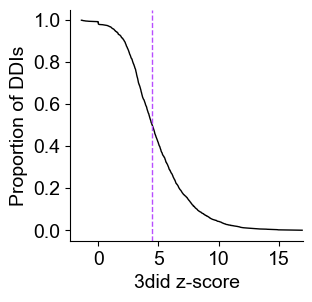

In [109]:
# Plot for z-score distribution of intrachain DDI types

# Sort the metrics
metrics = DDI_intra_homodimer_wsc['Zscore'].sort_values()

# Calculate the cumulative distribution
cumulative = 1.0 - metrics.rank(method='first') / len(metrics)

# Plot the cumulative distribution
fig, axes = plt.subplots(figsize=figsize)
plt.plot(metrics, cumulative, marker='', linestyle='-', color='black', linewidth=1)
plt.xticks(range(0, 20, 5))
plt.xlim(None, 17)
axes.set_ylabel('Proportion of DDIs', fontsize= global_fontsize)
axes.set_xlabel('3did z-score', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)
axes.minorticks_off()

# Add vertical line at specific x-axis position, e.g., at x=5
x_value = 4.47
plt.axvline(x=x_value, color='#b84dff', linestyle='--', linewidth=1)


plt.savefig(f'{save_path}intrachain_homodimers_zscore_distribution.pdf', transparent=True, bbox_inches='tight')
plt.show()

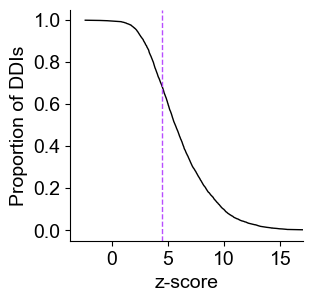

In [110]:
# Plot for z-score distribution of homodimeric DDI types

# Sort the metrics
metrics = DDI_inter_homodimer_wsc['Zscore'].sort_values()

# Calculate the cumulative distribution
cumulative = 1.0 - metrics.rank(method='first') / len(metrics)

# Plot the cumulative distribution
fig, axes = plt.subplots(figsize=figsize)
plt.plot(metrics, cumulative, marker='', linestyle='-', color='black', linewidth=1)
plt.xticks(range(0, 30, 5))
plt.xlim(None, 17)
axes.set_ylabel('Proportion of DDIs', fontsize= global_fontsize)
axes.set_xlabel('z-score', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)
axes.minorticks_off()

# Add vertical line at specific x-axis position, e.g., at x=5
x_value = 4.47
plt.axvline(x=x_value, color='#b84dff', linestyle='--', linewidth=1)


plt.savefig(f'{save_path}interchain_homodimers_zscore_distribution.pdf', transparent=True, bbox_inches='tight')
plt.show()